#### 폐암 : 폐에 생긴 악성 종양, 폐 자체에 발생하거나 다른 장기에 생긴 암이 폐로 전이되어 발생하는 것

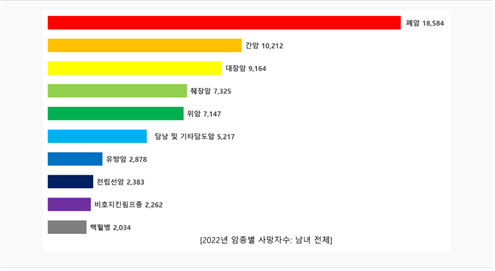

##### 국가 정보 암센터에서 제공하는 임종별 사망자 추이를 보면 국내에서 폐암으로 사망하는 환자의 수가 압도적으로 높음

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 
# - 캐글에서 폐암 예측이라는 데이터가 있길래 가져옴
# - 데이터의 부재: 2022 데이터라곤 표기가 되어있지만, 표본집단이 어떻게 선별이 됐고, 어느 나라 사람인지, 어디 인종인지에 대한 표본집단에 대한 설명이 없음
# - 편향된 데이터 (연령) // 작은 표본집단으로 인해서 깔끔한 통계라곤 할 순 없으나, 판다스를 활용하여 직접 데이터 분석을 했다는 것에 의의

In [3]:
file_name = "cancer.csv"

In [4]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


##### Y = 2, N = 1
- GENDER = 성별, M = 남자, F = 여자
- AGE = 환자 연령
- SMOKING = 흡연여부 
- YELLOW_FINGERS = 노란 손가락 여부 
- ANXIETY = 불안 여부 
- PEER_PRESSURE = 동료 압박
- CHRONIC DISEASE = 만성 질환 
- FATIGUE = 피로 
- ALLERGY = 알르레기
- WHEEZING = 숨을 내쉴 때 쌔 하는 소리
- ALCOHOL CONSUMING = 알코올 소비 
- COUGHING = 기침 
- SHORTNESS OF BREATH = 호흡곤란
- SWALLOWING DIFFICULTY = 침을 삼키는데의 어려움
- CHEST PAIN = 가슴통증 
- LUNG_CANCER = 폐암 여부

In [5]:
cancerDF = pd.read_csv(file_name)
cancerDF

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [6]:
# 결측치 제거
cancerDF.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
# 중복값 확인
cancerDF.duplicated().sum()

33

In [8]:
# 중복값 제거
CANCERDF = cancerDF.drop_duplicates(ignore_index=True)
CANCERDF

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
272,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
273,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
274,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [9]:
# 필요없는 칼럼 삭제
# 걱정, 동료 압박, 피로, 알러지
CANCERDF.drop(["ANXIETY", "PEER_PRESSURE", "FATIGUE ", "ALLERGY "], axis = 1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,2,1,2,NO
3,M,63,2,2,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,1,2,1,2,1,2,1,YES
272,F,59,2,1,2,1,1,1,2,1,1,NO
273,M,55,2,1,1,1,1,1,2,1,2,NO
274,M,46,1,2,1,1,1,1,1,2,2,NO


In [10]:
# 실험 참가자 중에서 폐암 발생 여부 
hap_yes = 0
hap_no = 0

for cancer in CANCERDF.LUNG_CANCER :
    if cancer == "YES" :
        hap_yes += 1
    else :
        hap_no += 1
print(f"폐암을 걸린 사람의 수 : {hap_yes}명")
print(f"폐암을 걸리지 않은 사람의 수 : {hap_no}명")

폐암을 걸린 사람의 수 : 238명
폐암을 걸리지 않은 사람의 수 : 38명


### 데이터의 결함 : 실험 참가수 중에서 폐암을 걸린 사람의 수가 압도적으로 높음 
                    => 결과에 영향을 많이 끼침

In [11]:
# 실험자 나이 측정 (평균, 최대, 최소, 중앙, 최빈)
# AGE 칼럼 모두 숫자인지 확인 
# isnumberic을 사용하려고 했으나, 문자열 메서드라 사용 못하고 혼자 고민해본 결과 type = int로 카운팅
hap = 0
old = 0

for age in CANCERDF.AGE :
    if type(age) == int :
        hap += 1
    if age >= 51 :
        old += 1
print(f"AGE 칼럼에서 숫자로 입력된 데이터의 수 : {hap} 개")
CANCERDF.AGE.sum() # 17363
print(f"설문조사 참가자의 나이의 평균 : {CANCERDF.AGE.sum()/CANCERDF.AGE.count():.4}")
print(f"최고령 참가자의 나이 : {CANCERDF.AGE.max()}")
print(f"최연소 참가자의 나이 : {CANCERDF.AGE.min()}")
print(f"설문조사 참가자의 나이 중앙값 : {CANCERDF.AGE.median()}")
print(f"설문조사 참가자의 나이 최빈값 : {CANCERDF.AGE.mode()}")
print(f"51세 이상 사람 : {old}")


AGE 칼럼에서 숫자로 입력된 데이터의 수 : 276 개
설문조사 참가자의 나이의 평균 : 62.91
최고령 참가자의 나이 : 87
최연소 참가자의 나이 : 21
설문조사 참가자의 나이 중앙값 : 62.5
설문조사 참가자의 나이 최빈값 : 0    64
Name: AGE, dtype: int64
51세 이상 사람 : 262


##### 1. 20 ~ 40세 : 청년층
##### 2. 41 ~ 60세 : 중년층
##### 3. 61 ~      : 노년층

In [12]:
# 나이 칼럼 범주화
CANCERDF.loc[:, "AGE"]
bins = [20, 40, 60, 90]
labels = ["청년층", "중년층", "노년층"]
CANCERDF["AGE_RANGE"] = pd.cut(CANCERDF["AGE"], bins=bins, labels=labels, right = False)

CANCERDF

C:\Users\hwans\AppData\Local\Temp\ipykernel_26200\2722449865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CANCERDF["AGE_RANGE"] = pd.cut(CANCERDF["AGE"], bins=bins, labels=labels, right = False)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_RANGE
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,노년층
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,노년층
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,중년층
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,노년층
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,노년층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES,중년층
272,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO,중년층
273,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO,중년층
274,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO,중년층


In [13]:
# 나이 범주 빈도수 확인
CANCERDF["AGE_RANGE"].value_counts()

AGE_RANGE
노년층    184
중년층     89
청년층      3
Name: count, dtype: int64

### [해석 1]
데이터가 노년층의 수와 청년층의 수가 불균형이 심함

In [14]:
# 데이터 분포 확인
CANCERDF.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_RANGE
count,276,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276,276
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,노년층
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238,184
mean,NaN,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,NaN,NaN
std,NaN,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,NaN,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
50%,NaN,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN


In [15]:
# 나이대별 폐암 걸린 비율 
young = (CANCERDF.loc[:, ['AGE_RANGE']] == '청년층')
middle = (CANCERDF.loc[:, ['AGE_RANGE']] == '중년층')
old = (CANCERDF.loc[:, ['AGE_RANGE']] == '노년층')

young_CANCERDF = CANCERDF[young.iloc[:, 0]]
middle_CANCERDF = CANCERDF[middle.iloc[:, 0]]
old_CANCERDF = CANCERDF[old.iloc[:, 0]]

print("청년층 폐암 발병 비율 : ", ((young_CANCERDF['LUNG_CANCER'] == "YES").sum()/len(young_CANCERDF)))
print("중년층 폐암 발병 비율 : ", (middle_CANCERDF['LUNG_CANCER'] == "YES").sum()/len(middle_CANCERDF))
print("노년층 폐암 발병 비율 : ", (old_CANCERDF['LUNG_CANCER'] == "YES").sum()/len(old_CANCERDF))

청년층 폐암 발병 비율 :  0.6666666666666666
중년층 폐암 발병 비율 :  0.8314606741573034
노년층 폐암 발병 비율 :  0.8804347826086957


# 미국 질병통제예방센터 (CDC Lung Cancer Statistics )에 따르면 연령대가 높을수록
# 암 발생률이 높다는 통계를 제시함 (2021년 기준)

##### NIH(NATIONAL CANCER INSTITUTE ; 미국 국립 암 연구소)에서 발표한 논문에서 노화가 주요 발암물질이라고 공개함.
1. 노화가 진행됨에 따라 세포의 단백질과 DNA가 약해져서 더이상 세포분열을 하지 않지만, 암세포는 지속적으로 세포분열을 일으킴
   ====> 연령대가 높을수록 암 발생률이 높음 
[출처 : https://www.cancer.gov/news-events/cancer-currents-blog/2018/sharpless-aging-cancer-research (2018)
        Si Houn Hahn, M.D, Ph.D : Molecular Biology in Cancer Genetics (1996)]

![alt text](<연령대별 폐암 추이.png>)

In [16]:
# 미국 질병통제예방센터 (CDC Lung Cancer Statistics )

In [17]:
# 성별의 명수
man = len(CANCERDF[CANCERDF['GENDER'] == 'M'])
woman = len(CANCERDF[CANCERDF['GENDER'] == 'F'])
print(f"남성 참가자의 수 : {len(CANCERDF[CANCERDF['GENDER'] == 'M'])}")
print(f"여성 참가자의 수 : {len(CANCERDF[CANCERDF['GENDER'] == 'F'])}")

남성 참가자의 수 : 142
여성 참가자의 수 : 134


In [18]:
# 성별 별 폐암 비율 
male = (CANCERDF.loc[:, ['GENDER']] == 'M')
female = (CANCERDF.loc[:, ['GENDER']] == 'F')
male_CANCERDF = CANCERDF[male.iloc[:, 0]]
female_CANCERDF = CANCERDF[female.iloc[:, 0]]
print("남성 중 폐암 발병 비율 : ", (male_CANCERDF['LUNG_CANCER'] == "YES").sum()/man)
print("여성 중 폐암 발병 비율 : ", (female_CANCERDF['LUNG_CANCER'] == "YES").sum()/woman)

남성 중 폐암 발병 비율 :  0.8802816901408451
여성 중 폐암 발병 비율 :  0.8432835820895522


![alt text](<M/F 성비에 따른 폐암.png>)

In [19]:
# [출처 : https://seer.cancer.gov/statistics-network/explorer/application.html?site=1&data_type=1&graph_type=2&compareBy=sex&chk_sex_3=3&chk_sex_2=2&rate_type=2&race=1&age_range=1&hdn_stage=101&advopt_precision=1&advopt_show_ci=on&hdn_view=0&advopt_show_apc=on&advopt_display=2#resultsRegion0]
# NIH(NATIONAL CANCER INSTITUTE ; 미국 국립 암 연구소)에서 발표한 논문에서 2000 ~ 2021년 사이에 여성보다 남성에서 암 발생률이 더욱 높다고 발표함

##### [해석]
- 남/녀의 환경적 요인(흡연률, 근무환경)보다 신체적 요인에서 암에 걸릴 가능성이 더욱 높다는 연구결과 
- 남성 에스트로겐, 프로게스테론의 수치가 낮기에 여성보다 암의 걸릴 확률 증가
- X 염색체에는 여러 종양 억제 유전자가 들어가 있는데 여성은 XX 염색체, 남성은 XY 염색체이기 떄문에 생물학적으로 여성보다 남성의 발병률이 더욱 높음

[출처 : verywellhealth ; https://www.verywellhealth.com/cancer-incidence-men-vs-women-6541922]

In [20]:
# 노란손가락을 가진 사람의 수
yfperson = len(CANCERDF[CANCERDF['YELLOW_FINGERS'] == 2])
nyfperson = len(CANCERDF[CANCERDF['YELLOW_FINGERS'] == 1])
print(f"노란손가락을 가진 참가자의 수 : {len(CANCERDF[CANCERDF['YELLOW_FINGERS'] == 2])}")
print(f"노란손가락을 가지지 않은 참가자의 수 : {len(CANCERDF[CANCERDF['YELLOW_FINGERS'] == 1])}")

노란손가락을 가진 참가자의 수 : 159
노란손가락을 가지지 않은 참가자의 수 : 117


In [21]:
# 노란손가락을 가진 사람 중 폐암 발생 여부
yellow_finger = (CANCERDF.loc[:, ['YELLOW_FINGERS']] == 2)
no_yellow_finger = (CANCERDF.loc[:, ['YELLOW_FINGERS']] == 1)
yellow_finger_CANCERDF = CANCERDF[CANCERDF['YELLOW_FINGERS'] == 2]
no_yellow_finger_CANCERDF = CANCERDF[CANCERDF['YELLOW_FINGERS'] == 1]
print("노란손가락을 가진 사람 중 폐암 발병 비율 : ", (yellow_finger_CANCERDF['LUNG_CANCER'] == "YES").sum()/yfperson)
print("노란손가락을 가지고 있지 않은 사람 중 폐암 발병 비율 : ", (no_yellow_finger_CANCERDF['LUNG_CANCER'] == "YES").sum()/nyfperson)

노란손가락을 가진 사람 중 폐암 발병 비율 :  0.9182389937106918
노란손가락을 가지고 있지 않은 사람 중 폐암 발병 비율 :  0.7863247863247863


In [22]:
# 만성질환을 가진 사람의 수
y_CHRONIC_DISEASE = len(CANCERDF[CANCERDF['CHRONIC DISEASE'] == 2])
n_CHRONIC_DISEASE = len(CANCERDF[CANCERDF['CHRONIC DISEASE'] == 1])
print(f"만성 질환을 가진 참가자의 수 : {len(CANCERDF[CANCERDF['CHRONIC DISEASE'] == 2])}명")
print(f"만성 질환이 없는 참가자의 수 : {len(CANCERDF[CANCERDF['CHRONIC DISEASE'] == 1])}명")

만성 질환을 가진 참가자의 수 : 144명
만성 질환이 없는 참가자의 수 : 132명


In [23]:
# 만성질환을 가진 사람 중 폐암 발생 여부
yes_CHRONIC_DISEASE_CANCERDF = CANCERDF[CANCERDF['CHRONIC DISEASE'] == 2]
no_CHRONIC_DISEASE_CANCERDF = CANCERDF[CANCERDF['CHRONIC DISEASE'] == 1]
print("만성질환을 가진 사람 중에 폐암 발병 비율 : ", ((yes_CHRONIC_DISEASE_CANCERDF['LUNG_CANCER'] == "YES").sum() / y_CHRONIC_DISEASE))
print("만성질환을 가지고 있지 않은 사람 중에  폐암 발병 비율 : ", (no_CHRONIC_DISEASE_CANCERDF['LUNG_CANCER'] == "YES").sum() / n_CHRONIC_DISEASE)

만성질환을 가진 사람 중에 폐암 발병 비율 :  0.9097222222222222
만성질환을 가지고 있지 않은 사람 중에  폐암 발병 비율 :  0.8106060606060606


In [24]:
# 숨을 내쉴때 소리가 쎄 하는 사람의 수
bs_COUGHING = len(CANCERDF[CANCERDF['COUGHING'] == 2])
nbs_COUGHING = len(CANCERDF[CANCERDF['COUGHING'] == 1])
print(f"호흡시 쎄 하는 소리를 가진 참가자의 수 : {bs_COUGHING}명")
print(f"호흡시 쎄 소리를 내지 않는 사람의 참가자의 수 : {nbs_COUGHING}명")

호흡시 쎄 하는 소리를 가진 참가자의 수 : 159명
호흡시 쎄 소리를 내지 않는 사람의 참가자의 수 : 117명


In [25]:
# 호흡 시 소리가 나는 사람 중 폐암 발생 여부
bs_COUGHING_CANCERDF = CANCERDF[CANCERDF['COUGHING'] == 2]
nbs_COUGHING_CANCERDF = CANCERDF[CANCERDF['COUGHING'] == 1]
print("호흡시 쎄 하는 소리를 내는 참가자 중 폐암 발병 비율 : ", ((bs_COUGHING_CANCERDF['LUNG_CANCER'] == "YES").sum() / bs_COUGHING))
print("호흡시 쎄 소리를 내지 않는 사람 중 폐암 발병 비율 : ", ((nbs_COUGHING_CANCERDF['LUNG_CANCER'] == "YES").sum() / nbs_COUGHING))

호흡시 쎄 하는 소리를 내는 참가자 중 폐암 발병 비율 :  0.9371069182389937
호흡시 쎄 소리를 내지 않는 사람 중 폐암 발병 비율 :  0.7606837606837606


In [26]:
# 인원수 카운팅 및 각 칼럼별 폐암 발생 여부 함수 생성
def hamsoo (df, column_name) :
    have = len(df[df[column_name] == 2])
    no_have = len(df[df[column_name] == 1])

    have_df = df[df[column_name] == 2]
    no_have_df = df[df[column_name] == 1]

    have_cancer_rate = (have_df["LUNG_CANCER"] == "YES").sum() / have
    no_have_cancer_rate = (no_have_df["LUNG_CANCER"] == "YES").sum() / no_have

    print(f"{column_name} 값을 가진 참가자의 수 : {have}명")
    print(f"{column_name} 값을 가지지 않은 참가자의 수 : {no_have}명")
    print(f"{column_name} 값을 가진 참가자 중 폐암 발병 비율 : {have_cancer_rate}")
    print(f"{column_name} 값을 가지지 않은 참가자 중 폐암 발병 비율 : {no_have_cancer_rate}")
    print() 

In [27]:
# 알코올 소비를 하는 사람 수 + 폐암 발병 비율
hamsoo(CANCERDF, "ALCOHOL CONSUMING")

ALCOHOL CONSUMING 값을 가진 참가자의 수 : 152명
ALCOHOL CONSUMING 값을 가지지 않은 참가자의 수 : 124명
ALCOHOL CONSUMING 값을 가진 참가자 중 폐암 발병 비율 : 0.9539473684210527
ALCOHOL CONSUMING 값을 가지지 않은 참가자 중 폐암 발병 비율 : 0.75



In [28]:
# 반복문으로 칼럼 값 입력
for aa in ["SMOKING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"] :
    hamsoo(CANCERDF, aa)

# 흡연유무
# 기침
# 호흡곤란
# 침을 삼키는데 어려움 
# 가슴통증

SMOKING 값을 가진 참가자의 수 : 150명
SMOKING 값을 가지지 않은 참가자의 수 : 126명
SMOKING 값을 가진 참가자 중 폐암 발병 비율 : 0.8733333333333333
SMOKING 값을 가지지 않은 참가자 중 폐암 발병 비율 : 0.8492063492063492

COUGHING 값을 가진 참가자의 수 : 159명
COUGHING 값을 가지지 않은 참가자의 수 : 117명
COUGHING 값을 가진 참가자 중 폐암 발병 비율 : 0.9371069182389937
COUGHING 값을 가지지 않은 참가자 중 폐암 발병 비율 : 0.7606837606837606

SHORTNESS OF BREATH 값을 가진 참가자의 수 : 174명
SHORTNESS OF BREATH 값을 가지지 않은 참가자의 수 : 102명
SHORTNESS OF BREATH 값을 가진 참가자 중 폐암 발병 비율 : 0.8793103448275862
SHORTNESS OF BREATH 값을 가지지 않은 참가자 중 폐암 발병 비율 : 0.8333333333333334

SWALLOWING DIFFICULTY 값을 가진 참가자의 수 : 129명
SWALLOWING DIFFICULTY 값을 가지지 않은 참가자의 수 : 147명
SWALLOWING DIFFICULTY 값을 가진 참가자 중 폐암 발병 비율 : 0.9612403100775194
SWALLOWING DIFFICULTY 값을 가지지 않은 참가자 중 폐암 발병 비율 : 0.7755102040816326

CHEST PAIN 값을 가진 참가자의 수 : 154명
CHEST PAIN 값을 가지지 않은 참가자의 수 : 122명
CHEST PAIN 값을 가진 참가자 중 폐암 발병 비율 : 0.922077922077922
CHEST PAIN 값을 가지지 않은 참가자 중 폐암 발병 비율 : 0.7868852459016393



In [29]:
## 흡연
# 폐암 환자 중 80~90%의 원인은 흡연자

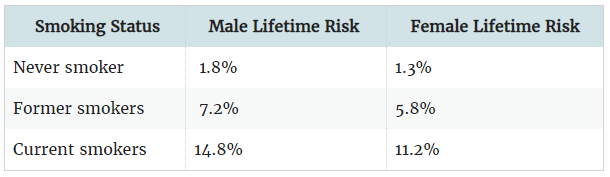

[출처 : verywellhealth ; https://www.verywellhealth.com/what-percentage-of-smokers-get-lung-cancer-2248868 ]
##### 전체 남성 중에서 현재 흡연자인 남성의 14.8%가 폐암에 걸릴 확률이 있다는 것 // 비흡연자 그룹보다 훨씬 높은 수치 (1995 ~ 2013)

In [30]:
# 청년층에서 성별에 따른 폐암 발병률 계산
young_male = CANCERDF[(CANCERDF['AGE_RANGE'] == '청년층') & (CANCERDF['GENDER'] == 'M')]
young_female = CANCERDF[(CANCERDF['AGE_RANGE'] == '청년층') & (CANCERDF['GENDER'] == 'F')]

young_male_DF = (young_male['LUNG_CANCER'] == "YES").sum() / len(young_male) 
young_female_DF = (young_female['LUNG_CANCER'] == "YES").sum() / len(young_female) 

print(f"청년층에서 폐암에 걸린 남성의 비율: {young_male_DF}") # 1명이 남자인데 1명이 폐암에 걸렸기에
print(f"청년층에서 폐암에 걸린 여성의 비율: {young_female_DF}") # 2명이 여자인데 1명이 폐암

청년층에서 폐암에 걸린 남성의 비율: 1.0
청년층에서 폐암에 걸린 여성의 비율: 0.5


In [31]:
# 중년층에서 성별에 따른 폐암 발병률 계산
middle_male = CANCERDF[(CANCERDF['AGE_RANGE'] == '중년층') & (CANCERDF['GENDER'] == 'M')]
middle_female = CANCERDF[(CANCERDF['AGE_RANGE'] == '중년층') & (CANCERDF['GENDER'] == 'F')]

middle_male_DF = (middle_male['LUNG_CANCER'] == "YES").sum() / len(middle_male) 
middle_female_DF = (middle_female['LUNG_CANCER'] == "YES").sum() / len(middle_female) 

print(f"중년층에서 폐암에 걸린 남성의 비율: {middle_male_DF}") 
print(f"중년층에서 폐암에 걸린 여성의 비율: {middle_female_DF}") 

중년층에서 폐암에 걸린 남성의 비율: 0.8444444444444444
중년층에서 폐암에 걸린 여성의 비율: 0.8181818181818182


In [32]:
# 노년층에서 성별에 따른 폐암 발병률 계산
old_male = CANCERDF[(CANCERDF['AGE_RANGE'] == '노년층') & (CANCERDF['GENDER'] == 'M')]
old_female = CANCERDF[(CANCERDF['AGE_RANGE'] == '노년층') & (CANCERDF['GENDER'] == 'F')]

old_male_DF = (old_male['LUNG_CANCER'] == "YES").sum() / len(old_male) 
old_female_DF = (old_female['LUNG_CANCER'] == "YES").sum() / len(old_female) 

print(f"중년층에서 폐암에 걸린 남성의 비율: {old_male_DF}") 
print(f"중년층에서 폐암에 걸린 여성의 비율: {old_female_DF}") 

중년층에서 폐암에 걸린 남성의 비율: 0.8958333333333334
중년층에서 폐암에 걸린 여성의 비율: 0.8636363636363636


In [33]:
# 흡연 유부와 성별에 따른 폐암 발생 여부
smoke_male = CANCERDF[(CANCERDF['SMOKING'] == 2) & (CANCERDF['GENDER'] == 'M')]
smoke_female = CANCERDF[(CANCERDF['SMOKING'] == 2) & (CANCERDF['GENDER'] == 'F')]

smoke_male_DF = (smoke_male['LUNG_CANCER'] == "YES").sum() / len(smoke_male) 
smoke_female_DF = (smoke_female['LUNG_CANCER'] == "YES").sum() / len(smoke_female) 

print(f"흡연자 중에 폐암에 걸린 남성의 비율: {smoke_male_DF}") 
print(f"흡연자 중에 폐암에 걸린 여성의 비율: {smoke_female_DF}")

흡연자 중에 폐암에 걸린 남성의 비율: 0.8875
흡연자 중에 폐암에 걸린 여성의 비율: 0.8571428571428571


##### 결론 및 아쉬운 점
- 페암 발생 원인에 대해서 여러 상관관계가 있었지만, 각 칼럼 중 폐암 환자의 비율이 가장 높았던 순은 침을 삼킬 때 목이 아픈 느낌이 있는 사람 (0.96, 소수 둘째), 알코올 소비하는 사람 (0.95), 잔기침을 자주하는 사람 (0.94), 호흡 시 쎼 소리가 나는 사람 (0.94), 노란손가락을 가진 사람 (0.92), 만성질환을 가진 사람 (0.91) 순으로 나타났다. 흡연유무의 비율이 가장 큰 줄 알았지만, 생각보다 다른 요인들에 비해 상대적으로 작은 값이 도출되어 신기했다. 실제로, 한국에서 연 0.6%의 비율로 흡연자 중 폐암의 걸린 환자의 수가 감소한다고 한다. 시간적 여유, 보다 깨끗한 데이터, 다양한 표본집단 등으로 명확하고 실제에 가까운 값을 도출해보고 싶다. 